In [54]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import xlrd
import matplotlib.pyplot as plt

rc('text',usetex = True)
rc('font', family='serif')

from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

In [55]:
workbook = xlrd.open_workbook('Input.xlsx')
worksheet = workbook.sheet_by_name('Data')

In [56]:
N = 67
R1 = zeros(N)
R2 = zeros(N)
R3 = zeros(N)
R4 = zeros(N)
B_rem = zeros(N)
Pi1 = zeros(N)
Pi2 = zeros(N)
B = zeros(N)

for i in range(N):
    R1[i] = worksheet.cell(0, i).value
    R2[i] = worksheet.cell(1, i).value
    R3[i] = worksheet.cell(2, i).value
    R4[i] = worksheet.cell(3, i).value
    B_rem[i] = worksheet.cell(4, i).value
    B[i] = worksheet.cell(5, i).value
    #B[i] = worksheet.cell(6, i).value

In [57]:
h = R3-R2
V_magnet = (R4**2 - R3**2 + R2**2-R1**2)
V_gap = (R3**2 - R2**2)
eta_vol = (B/B_rem)*((R3**2-R2**2)/(R4**2 - R3**2 + R2**2-20**2-R1**2))**0.5
V_in = R2**2 - R1**2
V_out = R4**2 - R3**2
V_t = R4**2 - R1**2

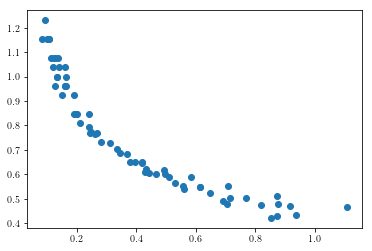

In [58]:
#plt.plot(V_magnet,eta,'o')
plt.plot(V_gap/V_out,B/B_rem,'o')

In [59]:
def eta(X,a,b,c,d,e,f): 
    P1,P2,P3,P4,P5 = X
    #return (a*((np.log(P1**b))+(np.log(P2**c))+(np.log(P3**d))+(np.log(P4**e)))*(P5**f))
    return (a*(P1**b)*(P2**c)*(P3**d)*(P4**e)*(P5**f))

In [60]:
M1 = curve_fit(eta,(R1,R2,R3,R4,B_rem),B)
#M = curve_fit(eta,phi, Qc,bounds=([-100,-100], [100,100]))
M1[0]

array([11.36971133, -0.69875616,  0.85791408, -2.14999203,  1.30524356,
       -2.17098325])

In [24]:
M1

(array([ 9.69470173e-04,  1.73196067e+00,  1.25827103e+00, -2.45994694e+00,
         1.15294986e+00,  5.50725608e+00]),
 array([[ 1.19992310e-06, -2.53924006e-04, -1.09776017e-05,
         -5.78331387e-06, -9.74533935e-06, -1.06118769e-03],
        [-2.53924006e-04,  5.56129438e-02,  5.20503393e-03,
         -3.05823848e-03,  1.96928316e-03,  2.31715563e-01],
        [-1.09776017e-05,  5.20503393e-03,  8.80357126e-03,
         -1.22316753e-02,  1.03080847e-03,  2.88180142e-02],
        [-5.78331387e-06, -3.05823848e-03, -1.22316753e-02,
          1.93749830e-02, -2.78398357e-03, -2.52859716e-02],
        [-9.74533935e-06,  1.96928316e-03,  1.03080847e-03,
         -2.78398357e-03,  1.68214201e-03,  1.24983739e-02],
        [-1.06118769e-03,  2.31715563e-01,  2.88180142e-02,
         -2.52859716e-02,  1.24983739e-02,  9.96193994e-01]]))

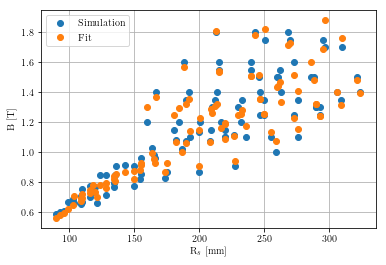

In [25]:
plt.plot(R4,B,'o',label = 'Simulation')
plt.plot(R4,eta((R1,R2,R3,R4,B_rem),M1[0][0],M1[0][1],M1[0][2],M1[0][3],M1[0][4],M1[0][5]),'o',label  = 'Fit')
plt.grid()
plt.legend()
plt.xlabel('R$_s$ [mm]')
plt.ylabel('B [T]')
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')

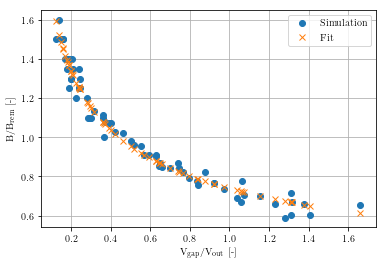

In [64]:
V_magnet = (R4**2 - R3**2)*pi*2/3
V_gap = (R3**2 - R2**2)*pi
T = (V_gap)/(V_magnet)
def eta2(X,a,e): 
    P2 = X
    #return (a*((np.log(P1**b))+(np.log(P2**c))+(np.log(P3**d))+(np.log(P4**e)))*(P5**f))
    return (a*(P2**e))
M = curve_fit(eta2,(T),B)
#M = curve_fit(eta,phi, Qc,bounds=([-100,-100], [100,100]))
M[0]

plt.plot(V_gap/(V_magnet),B,'o',label = 'Simulation')
plt.plot(V_gap/(V_magnet),eta2((V_gap/V_magnet),M[0][0],M[0][1]),'x',label  = 'Fit')
plt.grid()
plt.legend()
plt.xlabel('V$_\mathrm{gap}$/V$_\mathrm{out}$ [-]')
plt.ylabel('B/B$_\mathrm{rem}$ [-]')
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')

In [65]:
M[0]

array([ 0.73944842, -0.37023867])

In [29]:
Erro = abs(B/B_rem-eta((R1,R2,R3,R4),M1[0][0],M1[0][1],M1[0][2],M1[0][3],M1[0][4]))/(B/B_rem)*100

TypeError: eta() missing 1 required positional argument: 'f'

In [30]:
plt.plot(V_gap/(V_magnet),Erro,'o')
plt.grid()
plt.xlabel('R$_s$ [mm]')
plt.ylabel('Error [$\%$]')
plt.savefig('MagnetError.png',format = 'png', dpi=1000,bbox_inches='tight')

NameError: name 'Erro' is not defined

In [35]:
B_error = np.arange(0.55,1.85,0.01)

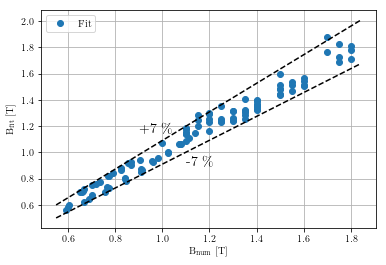

In [37]:
plt.plot(B,eta((R1,R2,R3,R4,B_rem),M1[0][0],M1[0][1],M1[0][2],M1[0][3],M1[0][4],M1[0][5]),'o',label  = 'Fit')
plt.plot(B_error,0.91*B_error,'k--')
plt.plot(B_error,1.09*B_error,'k--')
plt.grid()
plt.text(1.1, 0.9, '-7 $\%$', fontsize=14)
plt.text(0.9, 1.15, '+7 $\%$', fontsize=14)
plt.legend()
plt.xlabel('B$_\mathrm{num}$ [T]')
plt.ylabel('B$_\mathrm{fit}$ [T]')
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')

In [34]:
len(B_error)

110